## Questions to answer throughout the analysis
1. Which are the countries with the worst mortality rates, maximum cases and most fatalities.
2. Which is the monthly trend vis-a-vis the number of cases and facilities since the start of the pandemic?
3. In some of the countries, lockdowns were imnposed to help flatten the curve.Did this number aid in reducing the number of cases?

In [1]:
# importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
covid_data = pd.read_excel("./datasets/COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx")
covid_data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia
5,2020-06-24,24,6,2020,338,20,Afghanistan,AF,AFG,38041757.0,Asia
6,2020-06-23,23,6,2020,310,17,Afghanistan,AF,AFG,38041757.0,Asia
7,2020-06-22,22,6,2020,409,12,Afghanistan,AF,AFG,38041757.0,Asia
8,2020-06-21,21,6,2020,546,21,Afghanistan,AF,AFG,38041757.0,Asia
9,2020-06-20,20,6,2020,346,2,Afghanistan,AF,AFG,38041757.0,Asia


In [5]:
# getting infomations about the data
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26562 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26562 non-null  datetime64[ns]
 1   day                      26562 non-null  int64         
 2   month                    26562 non-null  int64         
 3   year                     26562 non-null  int64         
 4   cases                    26562 non-null  int64         
 5   deaths                   26562 non-null  int64         
 6   countriesAndTerritories  26562 non-null  object        
 7   geoId                    26455 non-null  object        
 8   countryterritoryCode     26498 non-null  object        
 9   popData2019              26498 non-null  float64       
 10  continentExp             26562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.2+ MB


In [6]:
# getting a summary of the data
covid_data.describe()

,dateRep,day,month,year,cases,deaths,popData2019
count,26562,26562.000000,26562.000000,26562.000000,26562.000000,26562.000000,2.649800e+04
mean,2020-04-21 03:27:51.109103360,16.207929,4.194790,2019.997478,380.722611,18.882690,4.689196e+07
min,2019-12-31 00:00:00,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,2020-03-25 00:00:00,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,2020-04-27 00:00:00,17.000000,4.000000,2020.000000,4.000000,0.000000,8.776119e+06
75%,2020-05-29 00:00:00,24.000000,5.000000,2020.000000,68.000000,1.000000,3.194979e+07
max,2020-06-29 00:00:00,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09
std,NaN,8.745421,1.555569,0.050161,2172.430663,121.386696,1.675462e+08


In [13]:
# changing the column names
covid_data.columns = ["date", "day", "month","year", "cases", "deaths", "country","old_country_code", "country_code", "population", "continent"]

In [14]:
# dropping redundant columns (the country code)
covid_data.drop(["old_country_code"], axis=1, inplace=True)

In [20]:
# mapping all the days in the unique months
unique_days_per_month = covid_data.groupby('month')['day'].nunique().reset_index()
unique_days_per_month.columns = ['month', 'total_days']
unique_days_per_month

,month,total_days
0,1,31
1,2,29
2,3,31
3,4,30
4,5,31
5,6,29
6,12,1


**NB:** There is only one data in December; hence remove the month 12

In [21]:
# creating a new dataframe without December
covid = covid_data[covid_data.month != 12]

In [22]:
# checking isna or isnull values
covid.isna().sum()

date             0
day              0
month            0
year             0
cases            0
deaths           0
country          0
country_code    63
population      63
continent        0
dtype: int64

In [23]:
# checking the percentage of the null values
covid.isna().sum().sum()/len(covid)

0.0047556142668428005

**NB:** The percentage of null values is less than 1 so can be dropped

In [25]:
# dropping nan values
covid.dropna()

,date,day,month,year,cases,deaths,country,country_code,population,continent
0,2020-06-29,29,6,2020,351,18,Afghanistan,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


**NB:** The data is not aggregated.

In [27]:
# Aggregating the data by country name
covid_by_country = covid.groupby("country")[["cases", "deaths"]].sum()
covid_by_country

,cases,deaths
country,,
Afghanistan,30967,721
Albania,2402,55
Algeria,13273,897
Andorra,855,52
Angola,267,11
...,...,...
Vietnam,355,0
Western_Sahara,208,1
Yemen,1118,302


In [28]:
# adding mortality rate to the aggregated data
covid_by_country['mortality_rate'] = covid_by_country["deaths"]/covid_by_country["cases"]
covid_by_country

,cases,deaths,mortality_rate
country,,,
Afghanistan,30967,721,0.023283
Albania,2402,55,0.022898
Algeria,13273,897,0.067581
Andorra,855,52,0.060819
Angola,267,11,0.041199
...,...,...,...
Vietnam,355,0,0.000000
Western_Sahara,208,1,0.004808
Yemen,1118,302,0.270125


### Visualizing the data


Text(0.5, 1.0, 'Countries With Highest Mortality Rates')

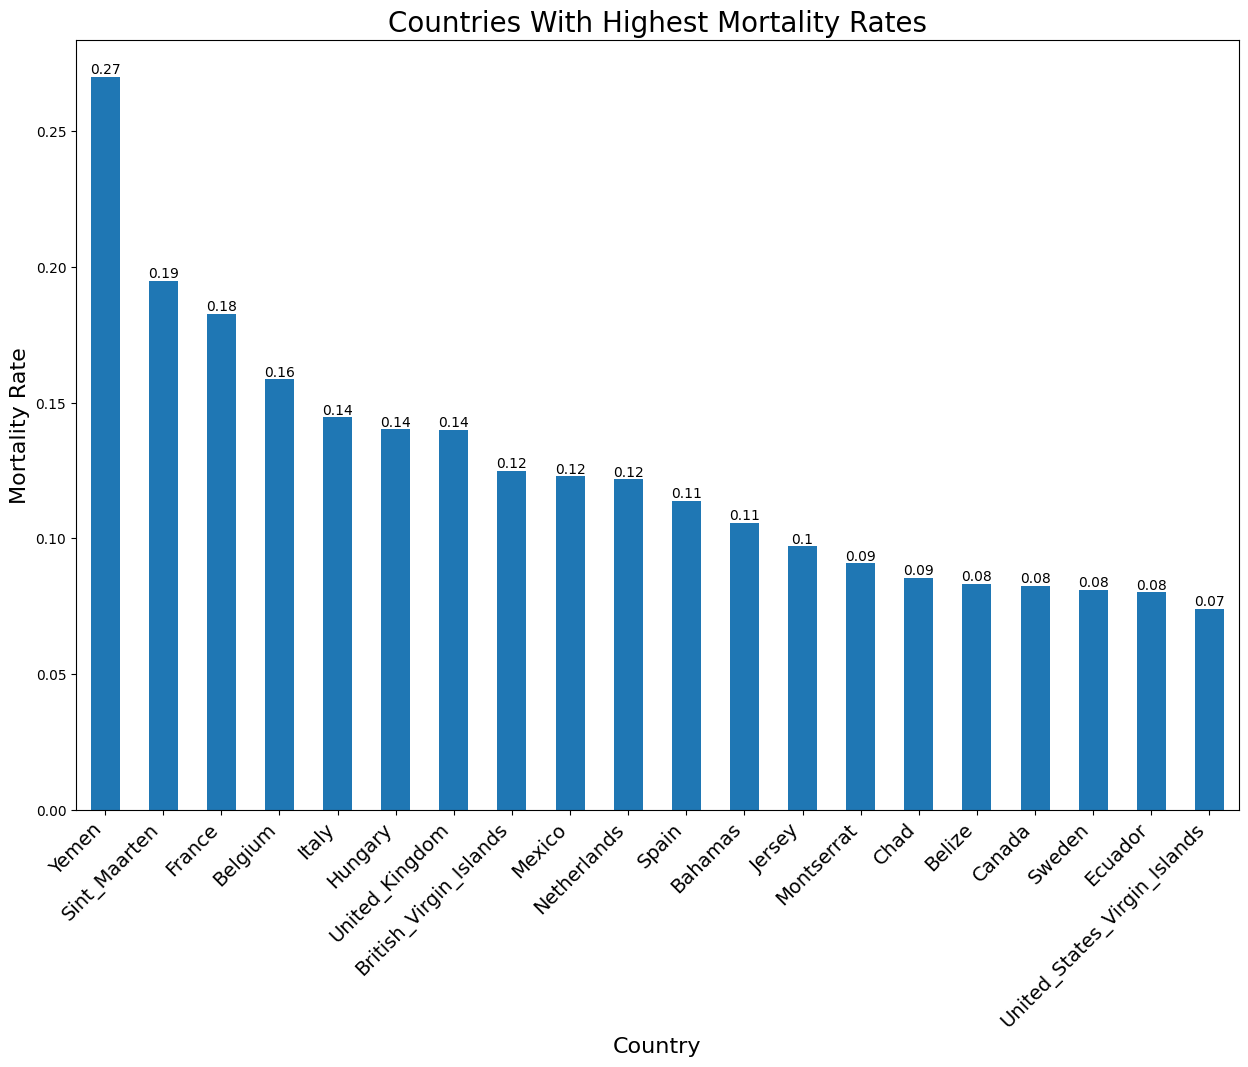

In [35]:
# displayng the top 20 countries with mortality rates
plt.figure(figsize=(15,10))
ax = covid_by_country["mortality_rate"].sort_values(ascending=False).head(20).plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=14)

for p in ax.patches:
    ax.annotate(
        p.get_height().round(2),
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom"
    )

ax.set_xlabel("Country", fontsize=16)
ax.set_ylabel("Mortality Rate", fontsize=16)
ax.set_title("Countries With Highest Mortality Rates",fontsize=20)

Text(0.5, 1.0, 'Top Ten Countries By Case Load')

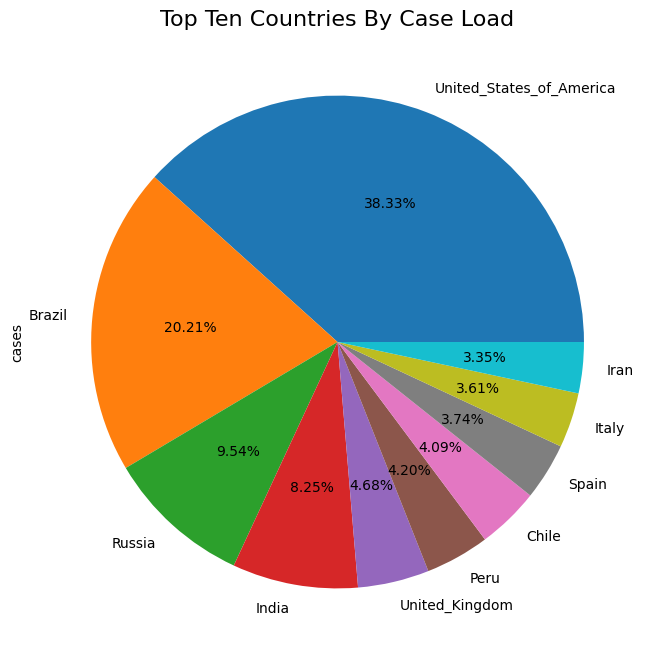

In [37]:
# displaying top 10 countries with highest number of Covid 19 cases using pie chart
cases = covid_by_country["cases"].sort_values(ascending=False)
ax = cases.head(10).plot(kind="pie", autopct="%.2f%%", labels=cases.index,figsize=(12,8))
ax.set_title("Top Ten Countries By Case Load", fontsize="16")

Text(0, 0.5, 'Number of Deaths')

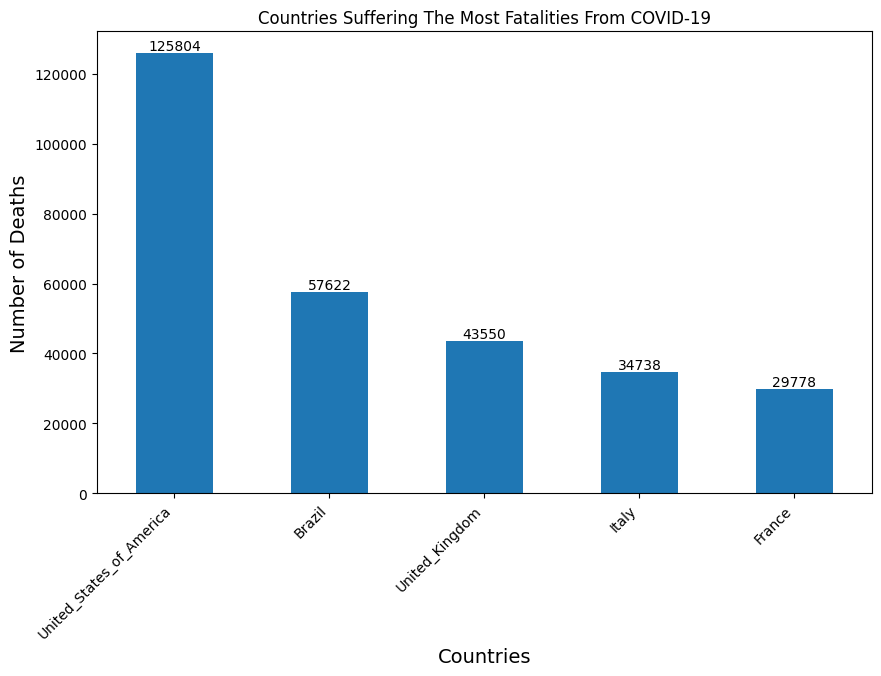

In [42]:
# displaying the top 5 countries that has suffered most death cases
plt.figure(figsize=(10,6))
ax = covid_by_country["deaths"].sort_values(ascending=False).head(5).plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(
        p.get_height(),
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha="center", va="bottom"
        )

ax.set_title("Countries Suffering The Most Fatalities From COVID-19")
ax.set_xlabel("Countries", fontsize=14)
ax.set_ylabel("Number of Deaths", fontsize=14)

Text(0, 0.5, 'Number of Deaths')

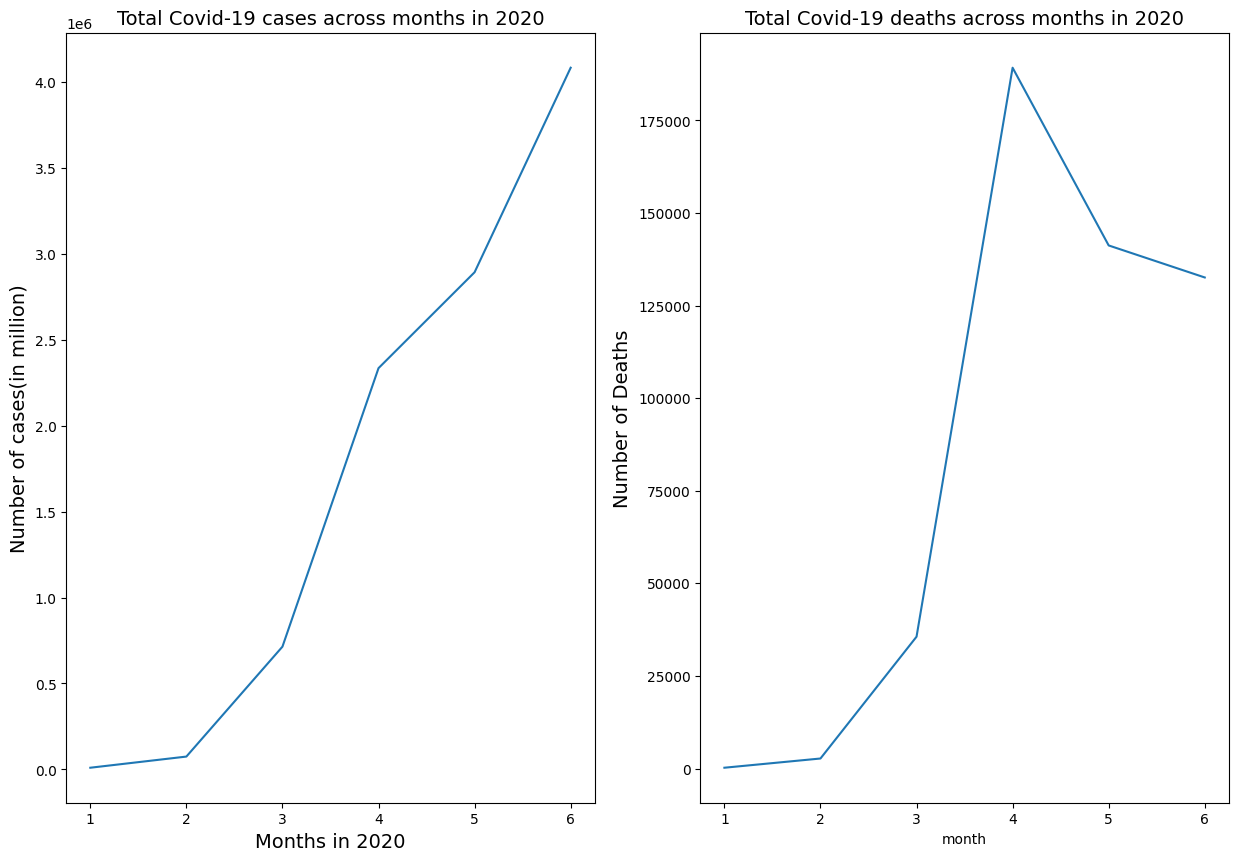

In [52]:
# plotting line graphs to see month-wise trend in no. of cases and fatalities
# aggregating the data by month
covid_by_month = covid.groupby("month")[['cases', 'deaths']].sum()

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

covid_by_month['cases'].plot(kind="line", ax=ax1)
ax1.set_title("Total Covid-19 cases across months in 2020", fontsize=14)
ax1.set_xlabel("Months in 2020", fontsize=14)
ax1.set_ylabel("Number of cases(in million)", fontsize=14)

covid_by_month["deaths"].plot(kind="line", ax=ax2)
ax2.set_title("Total Covid-19 deaths across months in 2020", fontsize=14)
ax.set_xlabel("Months in 2020", fontsize=14)
ax2.set_ylabel("Number of Deaths", fontsize=14)

**Nb:** Many countries imposed a lockdown to stem the tide of increasing cases and flatten the curve. Using the countries ---> India, UK, Italy and Germany <--- where lockdowns were imposed in March,  to see if this measure had the desired impact.
 

In [54]:
# creating a dataframe for each of the above countries
# monthwise aggregated data for Germany
covid_germany = covid[covid.country == "Germany"]
covid_germany_monthwise = covid_germany.groupby('month')[["cases", "deaths"]].sum()
covid_germany_grouped = covid_germany_monthwise.reset_index()

# monthwise aggregated data for UK
covid_uk = covid[covid.country == "United Kingdom"]
covid_uk_monthwise = covid_uk.groupby("month")[["cases", "deaths"]].sum()
covid_uk_grouped = covid_uk_monthwise.reset_index()

# monthwise aggregatted data for Italy
covid_italy = covid[covid.country == "Italy"]
covid_italy_monthwise = covid_italy.groupby("month")[["cases", "deaths"]].sum()
covid_italy_grouped = covid_italy_monthwise.reset_index()

# monthwise aggregated data for India
covid_india = covid[covid.country == "India"]
covid_india_monthwise = covid_india.groupby('month')[["cases", "deaths"]].sum()
covid_india_grouped = covid_india_monthwise.reset_index()

Text(0.5, 1.0, 'Cases in India across months')

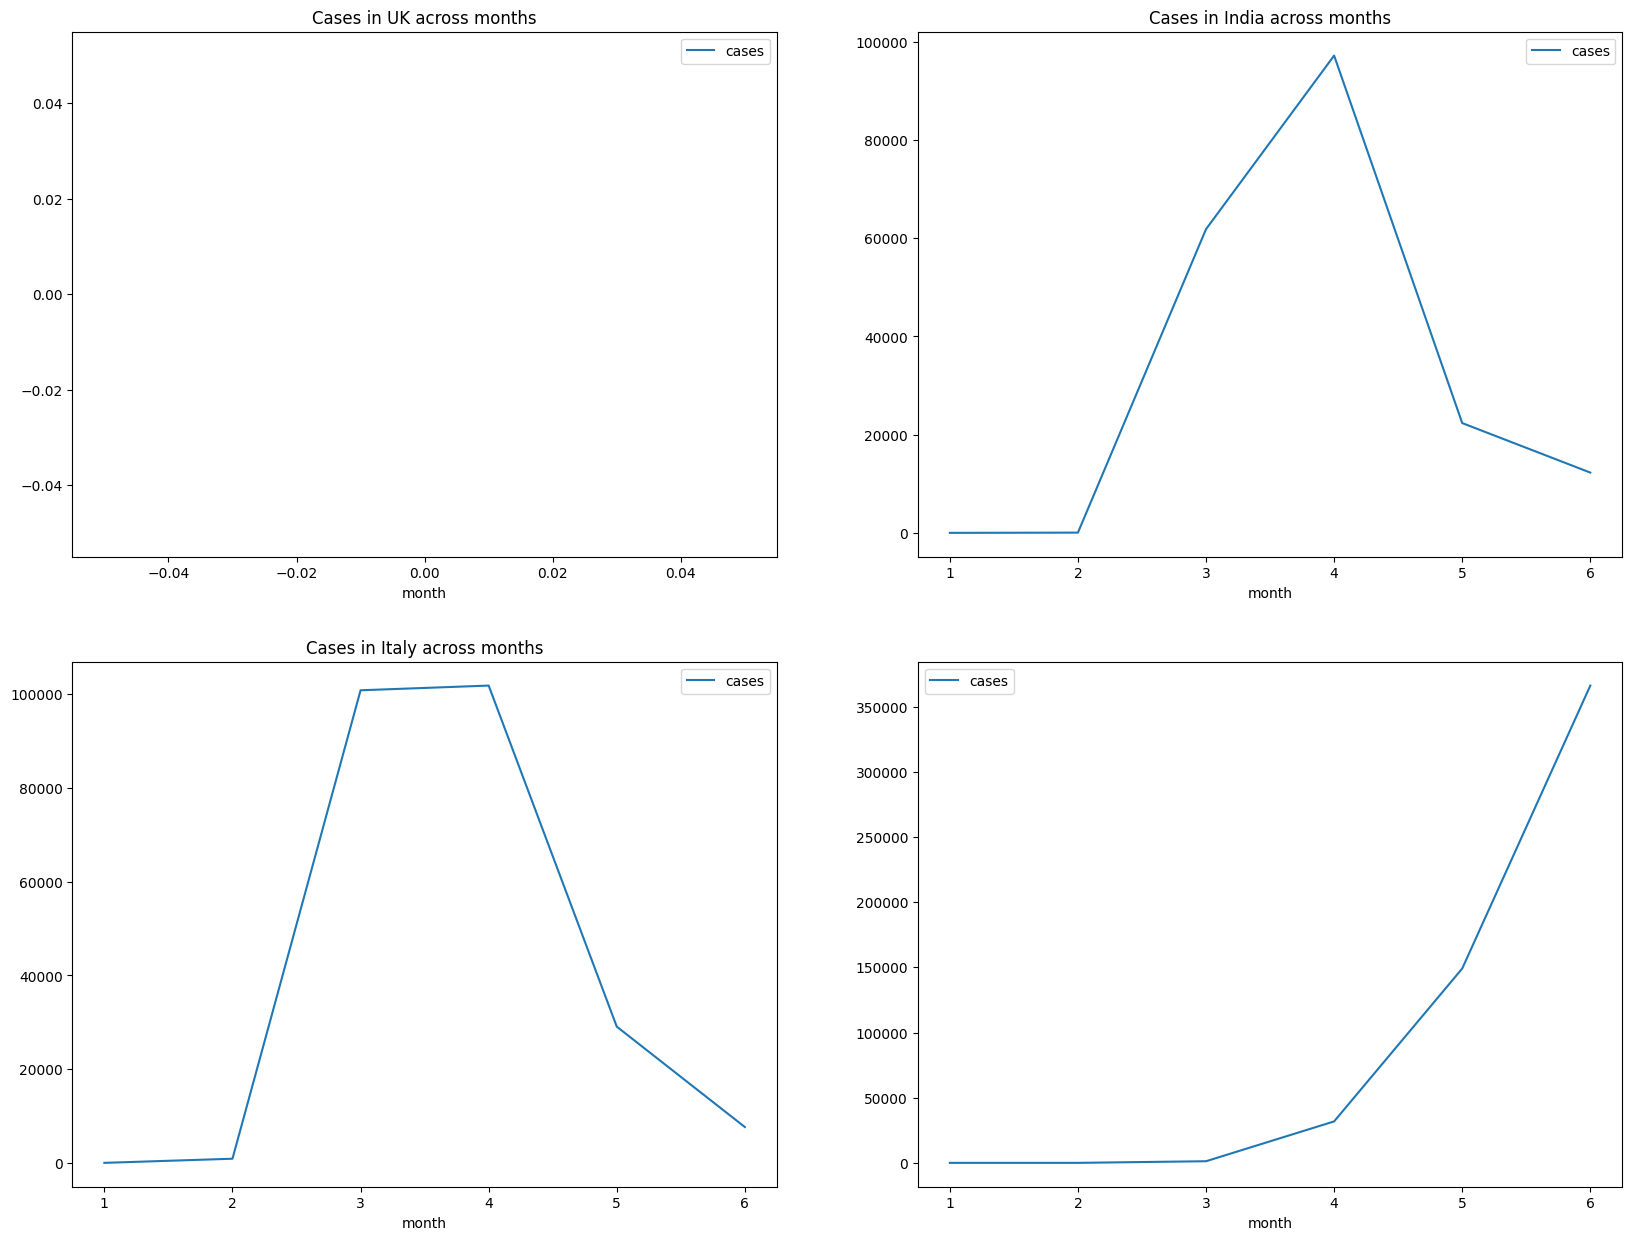

In [56]:
# plotting the data for the four countries (Germany, UK, Italy, India) where lockdownswere imposed
fig = plt.figure(figsize=(20, 15))

# plot for UK
ax1 = fig.add_subplot(2,2,1)
covid_uk_grouped.plot(kind="line", x="month", y="cases", ax=ax1)
ax1.set_title("Cases in UK across months")

# plot for Germany
ax2 = fig.add_subplot(2,2,2)
covid_germany_grouped.plot(kind="line", x="month", y="cases", ax=ax2)
ax2.set_title("Cases in Germany across months")

# plot for Italy
ax3 = fig.add_subplot(2,2,3)
covid_italy_grouped.plot(kind="line", x="month", y="cases", ax=ax3)
ax3.set_title("Cases in Italy across months")

# plot for India
ax4 = fig.add_subplot(2,2,4)
covid_india_grouped.plot(kind="line", x="month", y="cases", ax=ax4)
ax4.set_title("Cases in India across months")

In [57]:
covid_uk_grouped

,month,cases,deaths


### Observations Throughout The Analysis
#### Part 1
1. **Number of Cases:** The United States, Brazil, Russia, India and UK had the highest number of cases.
2. **Number of Deaths:** The United States, Brazil, UK and France had the highest death counts
3. **Mortality Rate:** Yemen, St. Maarten, France, Belgium and Italy had the highest mortality rates.

#### Part 2
1. The total number of cases has been increasing staedily, while the total number of fatalities(death) has shown a decrease after April.

#### Part 3

